In [1]:
pip install numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\kchuc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
def load_csv_to_matrix(file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path, header=None)
    # Convert the DataFrame to a NumPy array
    return df.values

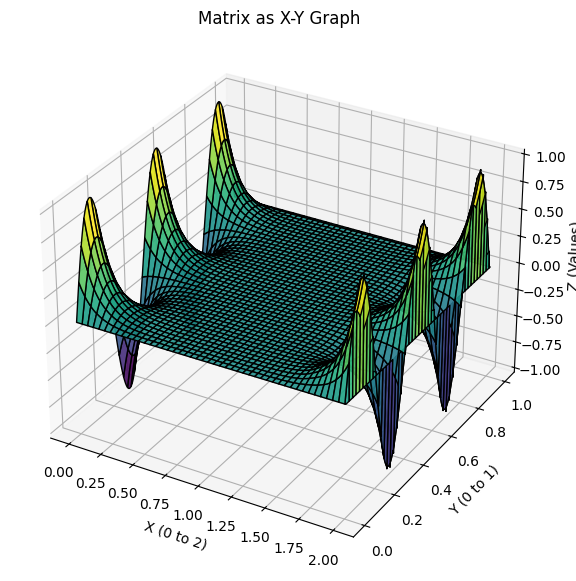

In [42]:
# Plot the matrix as an x-y graph
def plot_matrix_as_xy_graph(matrix, title="Matrix X-Y Plot", output_file=None):
    rows, cols = matrix.shape  # Note: matrix.shape returns (rows, cols)

    # Adjust the x and y domain
    x = np.linspace(0, 2, cols)  # Create x axis from 0 to 2 with 'cols' number of points
    y = np.linspace(0, 1, rows)  # Create y axis from 0 to 1 with 'rows' number of points
    x, y = np.meshgrid(x, y)  # Create meshgrid for plotting
    z = matrix  # z is the values of the matrix

    # Create the 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis', edgecolor='k', alpha=0.9)

    # Add labels and title
    ax.set_title(title)
    ax.set_xlabel('X (0 to 2)')
    ax.set_ylabel('Y (0 to 1)')
    ax.set_zlabel('Z (Values)')

if __name__ == "__main__":
    # Path to the CSV file
    csv_file = "matrix.csv"

    # Load the matrix
    matrix = load_csv_to_matrix(csv_file)

    # Plot the matrix as an X-Y graph
    plot_matrix_as_xy_graph(matrix, title="Matrix as X-Y Graph", output_file="xy_plot.png")

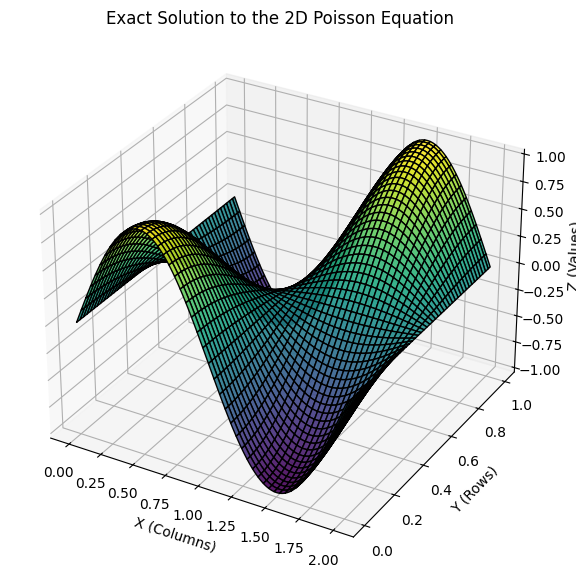

In [35]:
# Define the domain size
Lx = 2
Ly = 1
dx = 0.0001
dy = 0.0001
Nx = abs(1+Lx/dx)  # Number of grid points in x-direction
Ny = abs(1+Ly/dx) # Number of grid points in y-direction


# Create the grid points
x = np.linspace(0, Lx, int(Nx))
y = np.linspace(0, Ly, int(Ny))
                

# Create the meshgrid for plotting
X, Y = np.meshgrid(x, y)

# Exact solution: u(x, y) = sin(pi * x) * cos(pi * y)
u_exact = np.sin(np.pi * X) * np.cos(np.pi * Y)

# Function to plot matrix as an x-y graph (3D surface)
def plot_matrix_as_xy_graph(matrix, x, y, title="Matrix X-Y Plot", output_file=None):
    rows, cols = matrix.shape
    
    # Generate x and y indices from the grid
    X, Y = np.meshgrid(x, y)
    Z = matrix

    # Create the 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.9)

    # Add labels and title
    ax.set_title(title)
    ax.set_xlabel('X (Columns)')
    ax.set_ylabel('Y (Rows)')
    ax.set_zlabel('Z (Values)')

    # Show or save the plot
    if output_file:
        plt.savefig(output_file)
        print(f"3D plot saved to {output_file}")
    else:
        plt.show()

# Plot the matrix as an X-Y graph
plot_matrix_as_xy_graph(u_exact, x, y, title="Exact Solution to the 2D Poisson Equation")